<a href="https://colab.research.google.com/github/amiya559/GreatLearningUseCases/blob/master/NaiveBayes_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [37]:
wine_df = pd.read_csv("wine.csv")
wine_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [38]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


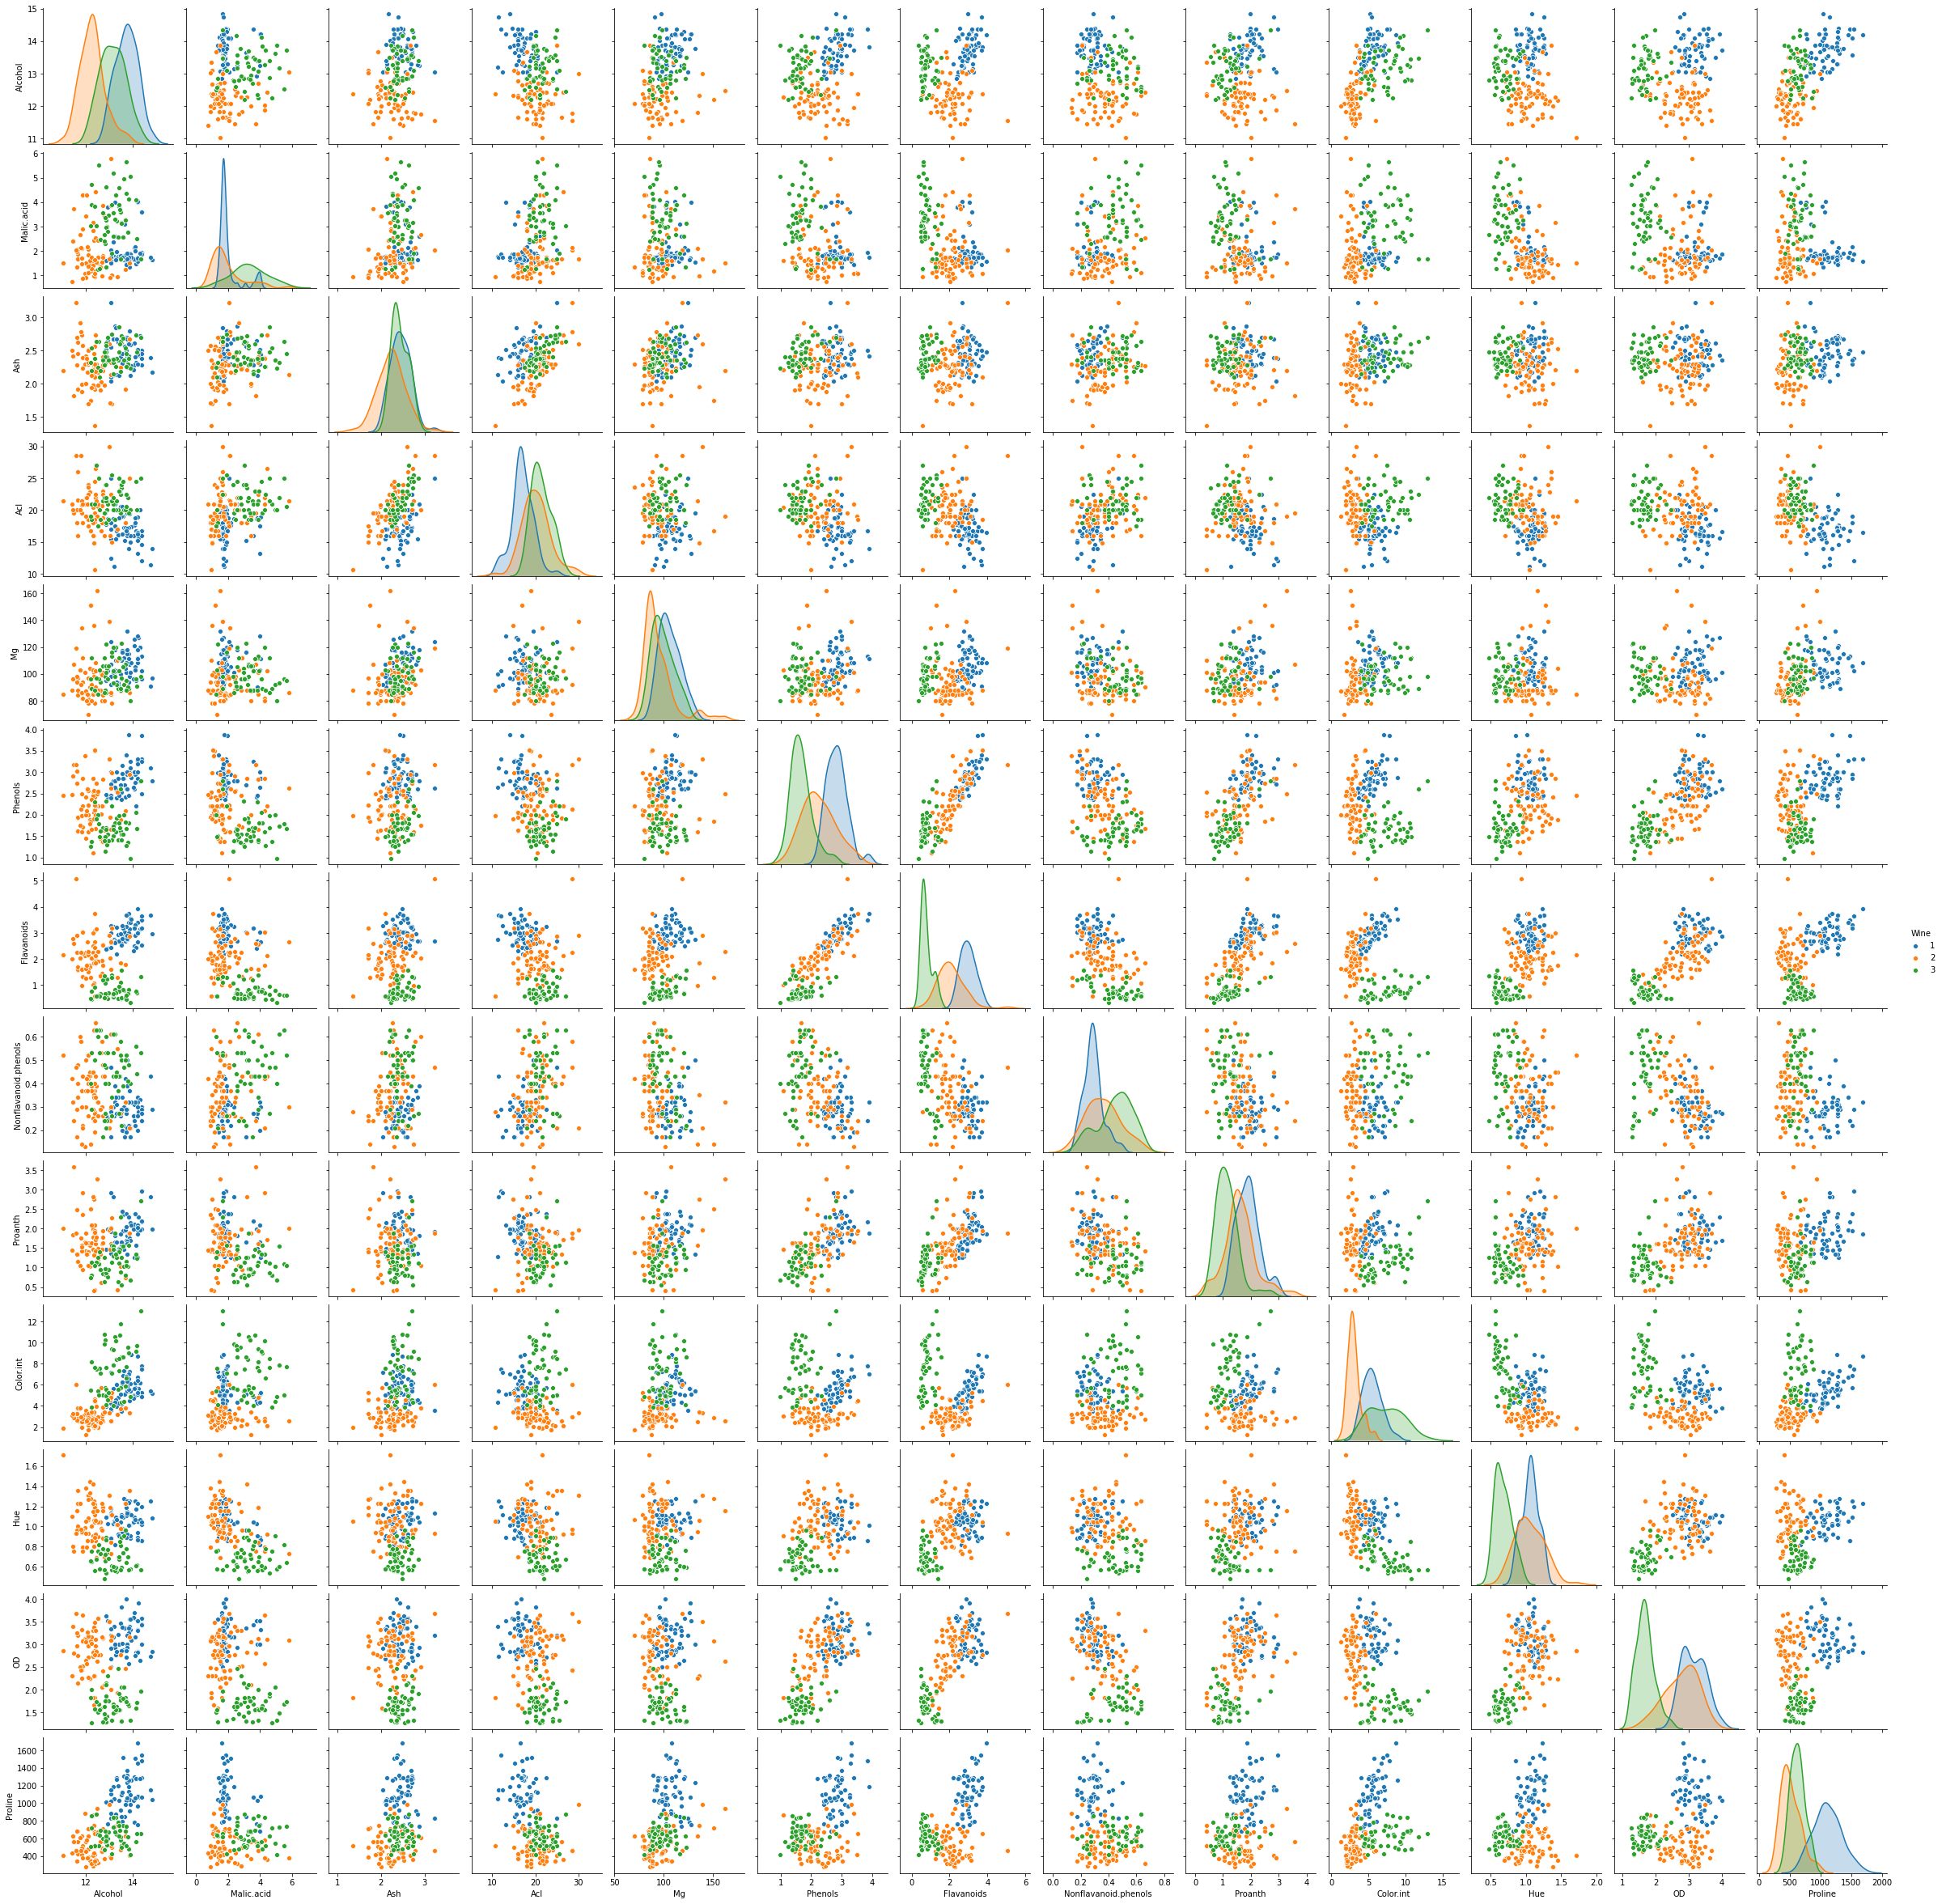

In [39]:
sns.pairplot(wine_df, diag_kind="kde", hue="Wine")

In [0]:
# Spliting data
X = wine_df.drop("Wine", axis = 1)
y = wine_df.pop("Wine")

In [0]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.30, random_state =1)

In [42]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
model.score(train_set, train_labels)

0.9758064516129032

In [0]:
test_pred = model.predict(test_set)



In [45]:
print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
